In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
files = [
    "aqi2021.csv",
    "aqi2022.csv",
    "aqi2023.csv",
    "aqi2024.csv",
    "aqi2025.csv"
]

df_list = []

for file in files:
    df = pd.read_csv(file)
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)
data.head()


,City,Date,AQI
0,Varanasi,2021-01-15,222.83
1,Varanasi,2021-02-15,202.90
2,Varanasi,2021-03-15,204.66
3,Varanasi,2021-04-15,195.30
4,Varanasi,2021-05-15,95.54


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    51 non-null     object 
 1   Date    51 non-null     object 
 2   AQI     51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
data.columns = data.columns.str.strip().str.lower()
print(data.columns)


Index(['city', 'date', 'aqi'], dtype='object')


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data = data.dropna()
data = data.sort_values(['city', 'date'])

data.head()


,city,date,aqi
0,Varanasi,2021-01-15,222.83
1,Varanasi,2021-02-15,202.90
2,Varanasi,2021-03-15,204.66
3,Varanasi,2021-04-15,195.30
4,Varanasi,2021-05-15,95.54


In [ ]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

data.head()


,city,date,aqi,year,month,day,dayofweek
0,Varanasi,2021-01-15,222.83,2021,1,15,4
1,Varanasi,2021-02-15,202.90,2021,2,15,0
2,Varanasi,2021-03-15,204.66,2021,3,15,0
3,Varanasi,2021-04-15,195.30,2021,4,15,3
4,Varanasi,2021-05-15,95.54,2021,5,15,5


In [ ]:
data['aqi_prev'] = data.groupby('city')['aqi'].shift(1)

data.head()


,city,date,aqi,year,month,day,dayofweek,aqi_prev
0,Varanasi,2021-01-15,222.83,2021,1,15,4,NaN
1,Varanasi,2021-02-15,202.90,2021,2,15,0,222.83
2,Varanasi,2021-03-15,204.66,2021,3,15,0,202.90
3,Varanasi,2021-04-15,195.30,2021,4,15,3,204.66
4,Varanasi,2021-05-15,95.54,2021,5,15,5,195.30


In [ ]:
data = data.dropna()
data.head()


,city,date,aqi,year,month,day,dayofweek,aqi_prev
1,Varanasi,2021-02-15,202.90,2021,2,15,0,222.83
2,Varanasi,2021-03-15,204.66,2021,3,15,0,202.90
3,Varanasi,2021-04-15,195.30,2021,4,15,3,204.66
4,Varanasi,2021-05-15,95.54,2021,5,15,5,195.30
5,Varanasi,2021-06-15,81.50,2021,6,15,1,95.54


In [ ]:
data['city_code'] = data['city'].astype('category').cat.codes
data[['city', 'city_code']].head()


,city,city_code
1,Varanasi,0
2,Varanasi,0
3,Varanasi,0
4,Varanasi,0
5,Varanasi,0


In [ ]:
X = data[['city_code', 'year', 'month', 'day', 'dayofweek', 'aqi_prev']]
y = data['aqi']

X.head()


,city_code,year,month,day,dayofweek,aqi_prev
1,0,2021,2,15,0,222.83
2,0,2021,3,15,0,202.90
3,0,2021,4,15,3,204.66
4,0,2021,5,15,5,195.30
5,0,2021,6,15,1,95.54


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

len(X_train), len(X_test)


(40, 10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:


y_pred = model.predict(X_test)
y_pred[:5]


array([65.75395, 46.0038 , 41.4288 , 40.5661 , 78.5361 ])

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 8.278975000000003
RMSE: 10.25727857005699
R2  : 0.4878201293793525


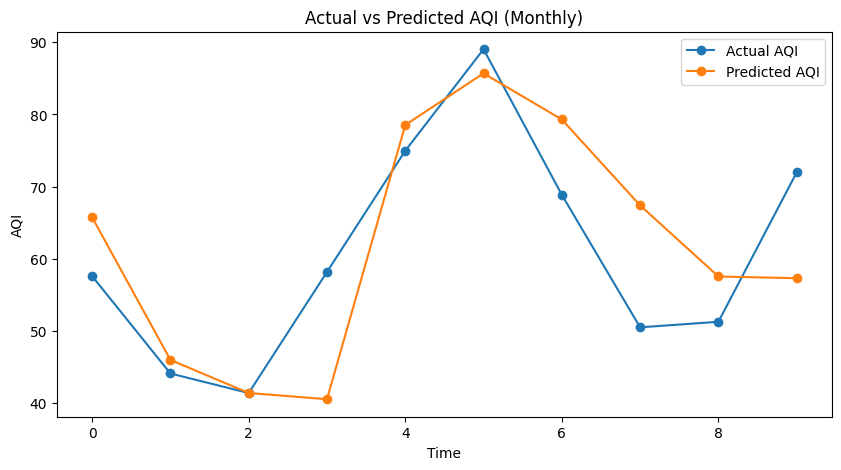

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual AQI", marker='o')
plt.plot(y_pred, label="Predicted AQI", marker='o')
plt.legend()
plt.title("Actual vs Predicted AQI (Monthly)")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.show()
